# <span style="color:#F72585"><center>Visualización del Entrenamiento de una Red Neuronal</center></span>

## <span style="color:#4361EE">Introducción</span>

Hasta este punto, sabemos los resultados de una red neuronal, pero ¿sabemos qué ocurre en el proceso de entrenamiento de manera visual?

La idea de este Notebook es generar una animación de la red neuronal mientras se entrena para mejorar la intuición del funcionamiento interno de estos modelos.

Para esto, necesitaremos:

- **Librerías de IA**
- **Librerías de Animación**

También usaremos los **widgets** de JupyterLab para mejorar la interactividad del contacto con imágenes generadas.

In [2]:
# Librería para manejo de tensores
import tensorflow as tf
# API para AI sobre motor de tensores (tensorflow)
from tensorflow import keras
# Manejo de arreglos
import numpy as np
# Manejo de DataFrames
import pandas as pd
# Dibujos matplotlib
import matplotlib.pyplot as plt
# Dibujos en seaborn
#import seaborn as sns
#Hacer Animación
from matplotlib.animation import FuncAnimation
# Escribir en gif, mp4, etc...
from matplotlib import animation
# Sacar animación en una ventana aparte
%matplotlib widget
from IPython import display

## <span style="color:#4361EE">Generación de Datos</span>

Para este ejemplo sencillo, haremos un ejercicio de simulación.

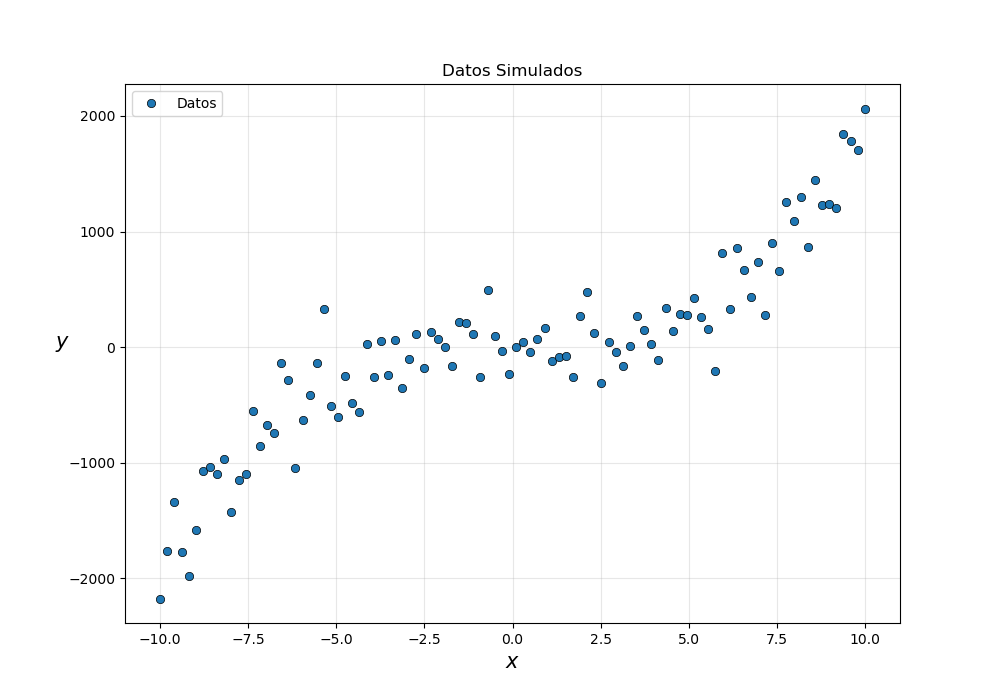

In [3]:
# Genera datos espaciados uniformemente
x=np.linspace(-10,10,100)
# Modelo generado a partir de las entradas ax^3+bx+ϵ
y=2*x**3+3*x+5*np.random.normal(0,50,size=len(x))


# Generar Lienzo
plt.close('all')
fig = plt.figure(figsize=(10,7))

plt.plot(x,y,'o',markeredgecolor='k',markeredgewidth=0.5)
plt.grid(alpha=0.3)
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)
plt.title('Datos Simulados')
plt.legend(['Datos']);

## <span style="color:#4361EE">Separación de Datos</span>

Es buena práctica separar el conjunto de datos en:

- Datos de Entrenamiento
- Datos de Validación
- Datos Test

Forma de Train: (70,)
Forma de Test : (30,)


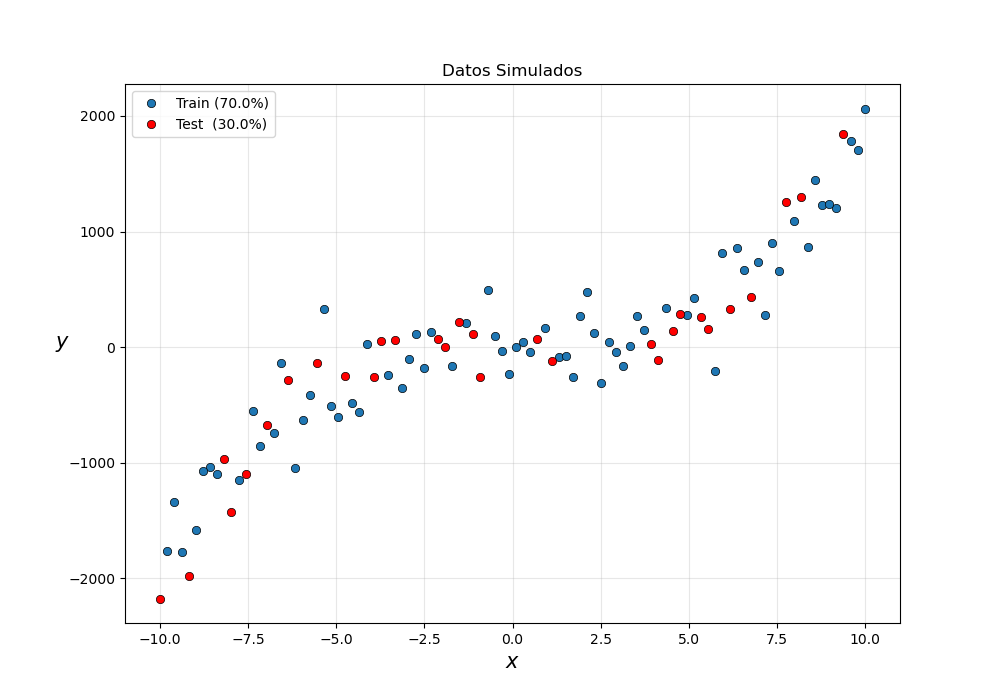

In [4]:
from sklearn.model_selection import train_test_split

# Tamaño del conjunto Test
test_size = 0.30
# Separación del Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

# Forma de los Datos Resultantes
print("Forma de Train:", x_train.shape)
print("Forma de Test :",x_test.shape)

# Generar Lienzo
plt.close('all')
fig = plt.figure(figsize=(10,7))
plt.grid(alpha=0.3)
# Dibujar train
plt.plot(x_train,y_train,'o',markeredgecolor='k',markeredgewidth=0.5)
# Dibujar test
plt.plot(x_test,y_test,'ro',markeredgecolor='k',markeredgewidth=0.5)
# Etiquetas de los Ejes
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)
# Leyendas
plt.legend([f'Train ({(1-test_size)*100}%)',f'Test  ({(test_size)*100}%)'])
plt.title('Datos Simulados');

## <span style="color:#4361EE">Creación de Modelos</span>

### <span style="color:#4CC9F0">Modelo sin Activaciones</span>

Para ilustrar lo lineal de un modelo simple (sin funciones de activación), miremos qué pasa cuando tenemos una red con una única neurona:

In [5]:
# Arquitectura del Modelo
model = keras.Sequential(
    # Una capa densa, 1 neurona, 1 variable de entrada
    keras.layers.Dense(units=1,input_shape=(1,))
    )

# Compilación del Modelo usando optimizador y pérdida
model.compile(optimizer='sgd', loss='mean_squared_error')
# Resumen del Modelo (Parámetros, etc)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2022-12-07 13:11:05.538710: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-07 13:11:05.539076: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 13:11:05.539538: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
n_iter=100

predecir=np.zeros((n_iter+1,len(x_train)))

predecir[0,:]=model.predict(sorted(x_train)).reshape(1,-1)

for i in range(n_iter):
    # Entrenar 1 epoch
    model.fit(x_train, y_train, epochs=1,verbose=1,validation_split=0.1)
    # Predecir puntos en ese estado
    predecir[i+1,:]=model.predict(sorted(x_train)).reshape(1,-1)

2022-12-07 13:11:11.676519: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-12-07 13:11:11.696802: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2694965000 Hz


2/2 [==============================] - 0s 251ms/step - loss: 136771.9375 - val_loss: 39527.2500


In [7]:
def animate(i):
    if i<n_iter:
        line.set_ydata(predecir[i,:])

In [8]:
fig = plt.figure(figsize=(12,5))


axes = fig.add_subplot(1,2,1)
plt.plot(x_train,y_train,'bo',scaley=True, scalex=True)
plt.plot(x_test,y_test,'ro',scaley=True, scalex=True,alpha=0.3)

line, = axes.plot(sorted(x_train), predecir[0,:], 'r-')

# Animación
ani = FuncAnimation(fig=fig, func=animate, interval=100)

# Visualización de Modelo para Datos Test
axes2 = fig.add_subplot(1,2,2)
predecir_test = model.predict(sorted(x_test),verbose=0).reshape(-1)
plt.plot(x_train,y_train,'bo',scaley=True, scalex=True,alpha=0.1)
plt.plot(x_test,y_test,'ro',scaley=True, scalex=True)
plt.plot(sorted(x_test),predecir_test,'r--',scaley=True, scalex=True)

# Etiquetas de los Ejes
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)

# Leyendas
plt.legend(['Train','Test','Red Neuronal'])
plt.title('Modelo Resultante para Test');

# Video para renderizar
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.close()

### <span style="color:#4CC9F0">Modelo con Activaciones y Profundidad</span>

In [9]:
model2 = tf.keras.Sequential([
    # 4 Capas densas con función de activación
    keras.layers.Dense(units=5,input_shape=(1,),activation='softplus'),
    keras.layers.Dense(units=10,activation='softplus'),
    keras.layers.Dense(units=20,activation='softplus'),
    keras.layers.Dense(units=1)
    ])
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_iter=100

predecir2=np.zeros((n_iter+1,len(x_train)))
predecir2[0,:]=model2.predict(sorted(x_train)).reshape(1,-1)

for i in range(n_iter):
    model2.fit(x_train, y_train, epochs=30,verbose=1,validation_split=0.1)
    predecir2[i+1,:]=model2.predict(sorted(x_train)).reshape(1,-1)

Epoch 1/30
2/2 [==============================] - 3s 794ms/step - loss: 670949.7083 - val_loss: 575281.0625
Epoch 2/30
2/2 [==============================] - 0s 277ms/step - loss: 633546.1667 - val_loss: 575128.3125
Epoch 3/30
2/2 [==============================] - 0s 274ms/step - loss: 654110.5417 - val_loss: 574977.4375
Epoch 4/30
2/2 [==============================] - 0s 216ms/step - loss: 661441.1250 - val_loss: 574828.5625
Epoch 5/30
2/2 [==============================] - 0s 238ms/step - loss: 596755.7500 - val_loss: 574680.8125
Epoch 6/30
2/2 [==============================] - 0s 234ms/step - loss: 632844.9583 - val_loss: 574539.1250
Epoch 7/30
2/2 [==============================] - 0s 175ms/step - loss: 614702.9792 - val_loss: 574405.9375
Epoch 8/30
2/2 [==============================] - 0s 210ms/step - loss: 655572.5000 - val_loss: 574270.5625
Epoch 9/30
2/2 [==============================] - 0s 265ms/step - loss: 574425.4792 - val_loss: 574138.5625
Epoch 10/30
2/2 [===========

In [18]:
def animate2(i):
    if i<n_iter:
        line.set_ydata(predecir2[i,:])

In [19]:
fig = plt.figure(figsize=(12,5))
axes = fig.add_subplot(1,2,1)

plt.plot(x_train,y_train,'bo')
plt.plot(x_test,y_test,'ro',alpha=0.3)
# Etiquetas de los Ejes
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)

line, = axes.plot(sorted(x_train), predecir2[0,:], 'r-')

# Leyendas
plt.legend(['Train','Test','Red Neuronal'])
plt.title('Visualizando Red Neuronal');

# Animación
ani2 = FuncAnimation(fig=fig, func=animate2, interval=150)

axes2 = fig.add_subplot(1,2,2)

predecir2_test = model2.predict(sorted(x_test),verbose=0).reshape(-1)
plt.plot(x_train,y_train,'bo',alpha=0.1)
plt.plot(x_test,y_test,'ro')
plt.plot(sorted(x_test),predecir2_test,'r--')

# Etiquetas de los Ejes
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)

# Leyendas
plt.legend(['Train','Test','Red Neuronal'])
plt.title('Modelo Resultante para Test');

video = ani2.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

### <span style="color:#4CC9F0">Datos más Retadores</span>

In [20]:
trend=0.1
time=np.arange(0,100,0.1)
value=trend*time+np.sin(time)+np.random.normal(scale=0.5,size=len(time))

In [21]:
model3 = tf.keras.Sequential([
    keras.layers.Dense(units=10,input_shape=(1,),activation='elu'),
    keras.layers.Dense(units=20,activation='elu'),
    keras.layers.Dense(units=30,activation='elu'),
    keras.layers.Dense(units=40,activation='elu'),
    keras.layers.Dense(units=50,activation='elu'),
    keras.layers.Dense(units=60,activation='elu'),
    keras.layers.Dense(units=70,activation='elu'),
    keras.layers.Dense(units=1)
    ])

model3.compile(optimizer='adam', loss='mean_squared_error')
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 20)                220       
                                                                 
 dense_8 (Dense)             (None, 30)                630       
                                                                 
 dense_9 (Dense)             (None, 40)                1240      
                                                                 
 dense_10 (Dense)            (None, 50)                2050      
                                                                 
 dense_11 (Dense)            (None, 60)                3060      
                                                                 
 dense_12 (Dense)            (None, 70)               

In [22]:
def animate3(i):
    if i<n_iter:
        line.set_ydata(predecir3[i,:])

In [23]:
n_iter=100

predecir3=np.zeros((n_iter,len(time)))

for i in range(n_iter):
    model3.fit(time, value, epochs=10,verbose=1)
    predecir3[i,:]=model3.predict(time).reshape(1,-1)

Epoch 1/10
32/32 [==============================] - 2s 5ms/step - loss: 2.7189
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7607
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7260
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7267
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7371
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7391
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7725
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7252
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7172
Epoch 10/10
32/32 [==============================] - 0s 3ms/step
Epoch 1/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7455
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7546
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - 

In [29]:
fig = plt.figure(figsize=(12,5))
axes = fig.add_subplot(1,1,1)

plt.plot(time,value,'b-',scaley=True, scalex=True)

line, = axes.plot(time, predecir3[0,:], 'r-')

ani3 = FuncAnimation(fig=fig, func=animate3, interval=200)

video = ani3.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()         

### <span style="color:#4CC9F0">Visualizaciones en 3D</span>

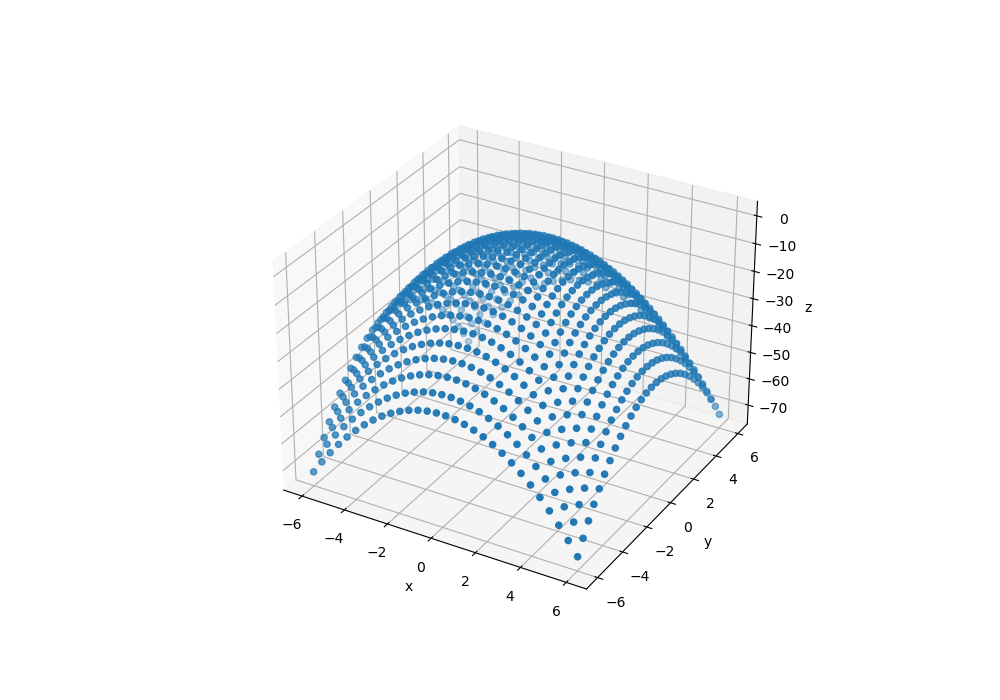

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# Generar Datos

def f(x, y):
    return -(x ** 2 + y ** 2)

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.close('all')

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [26]:
data = np.array([X, Y, Z]).reshape(3, -1).T
df_data = pd.DataFrame(data,columns=['x','y','z'])
df_data

,x,y,z
0,-6.000000,-6.0,-72.000000
1,-5.586207,-6.0,-67.205707
2,-5.172414,-6.0,-62.753864
3,-4.758621,-6.0,-58.644471
4,-4.344828,-6.0,-54.877527
...,...,...,...
895,4.344828,6.0,-54.877527
896,4.758621,6.0,-58.644471
897,5.172414,6.0,-62.753864
898,5.586207,6.0,-67.205707


In [27]:
model4 = tf.keras.Sequential([
    keras.layers.Dense(units=10,input_shape=(2,),activation='elu'),
    keras.layers.Dense(units=20,activation='elu'),
    keras.layers.Dense(units=1)
    ])

model4.compile(optimizer='adam', loss='mean_squared_error')
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                30        
                                                                 
 dense_15 (Dense)            (None, 20)                220       
                                                                 
 dense_16 (Dense)            (None, 1)                 21        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [28]:
n_iter=150

predecir4=np.zeros((n_iter+1,len(df_data['z'])))
predecir4[0,:]=model4.predict(df_data[['x','y']]).reshape(1,-1)

for i in range(n_iter):
    model4.fit(df_data[['x','y']].values, df_data['z'].values, epochs=1,verbose=1)
    predecir4[i+1,:]=model4.predict(df_data[['x','y']]).reshape(1,-1)

29/29 [==============================] - 0s 3ms/step


In [30]:
def animate4(i):
    if i<n_iter:
        ax.clear()
        ax.set_zlim(-70,10)
        ax.scatter3D(X, Y, Z)
        ax.plot_surface(X,Y,predecir4_grid[i,:,:],cmap='jet',shade=True,alpha=0.8)

In [31]:
predecir4_grid = predecir4.reshape(n_iter+1,X.shape[0],X.shape[1])
predecir4_grid.shape

(151, 30, 30)

In [32]:
plt.close('all')
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')

ax.set_zlim(-70,10)
ax.scatter3D(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.plot_surface(X,Y,predecir4_grid[0,:,:],cmap='jet',shade=True,alpha=0.8)


ani4 = FuncAnimation(fig=fig, func=animate4, interval=150)

video = ani4.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()